In [2]:
use std::fmt::Debug;
pub struct List<T>(Vec<T>);
impl<T: Debug> List<T> {
    pub fn evcxr_display(&self) {
        let mut html = String::new();
        
        html.push_str("<ol>");
        
        for item in &self.0 {
            html.push_str(&format!("<li>{:?}</li>", item));
        }
        
        html.push_str("</ol>");
        println!("EVCXR_BEGIN_CONTENT text/html\n{}\nEVCXR_END_CONTENT", html);
    }
}

In [3]:
let list = List(vec!["the good", "the bad", "the ugly"]);
list

"the good" "the bad" "the ugly"

In [4]:
:dep petgraph = "*"
:dep petgraph-evcxr = "*"

In [5]:
extern crate petgraph;
use petgraph::graph::Graph;
use petgraph::dot::Dot;
use petgraph_evcxr::{draw_graph, draw_dot};

In [6]:
let mut graph = Graph::<(), ()>::new(); // directed and unlabeled
graph.extend_with_edges(&[ (0, 1) ]);
assert_eq!(graph.node_count(), 2);
assert_eq!(graph.edge_count(), 1);

The type of the variable list was redefined, so was lost.


In [7]:
let mut graph = Graph::<&str, u32>::new();
let origin = graph.add_node("Denver");
let destination_1 = graph.add_node("San Diego");
let destination_2 = graph.add_node("New York");

graph.extend_with_edges(&[
    (origin, destination_1, 250),
    (origin, destination_2, 1099)
]);
println!("{}", Dot::new(&graph));

digraph {
    0 [ label = "Denver" ]
    1 [ label = "San Diego" ]
    2 [ label = "New York" ]
    0 -> 1 [ label = "250" ]
    0 -> 2 [ label = "1099" ]
}



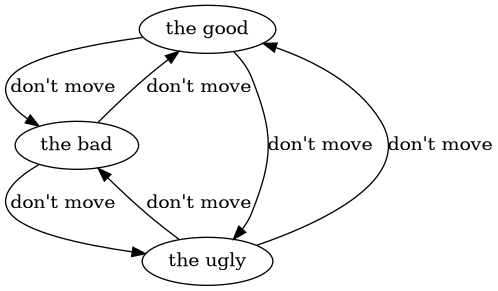

In [8]:
let mut g : Graph<&str, &str> = Graph::new();
let good = g.add_node("the good");
let bad = g.add_node("the bad");
let ugly = g.add_node("the ugly");

g.add_edge(good, bad, "don't move");
g.add_edge(bad, good, "don't move");
g.add_edge(bad, ugly, "don't move");
g.add_edge(ugly, bad, "don't move");
g.add_edge(ugly, good, "don't move");
g.add_edge(good, ugly, "don't move");
draw_graph(&g);